In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Define a matrix, mask and noise
p = 0.75
rank = 2

n = 40

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

In [30]:
def obj_func(m):
    svd = np.linalg.svd(m, compute_uv=False)
    
    return np.sum(svd[2:]) 

def comp_grad(m, boolMask, obj_func):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3
    
    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j] and np.random.random() > 1 - portion:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))
                
    return grad

def comp_hessian(m, boolMask, of):
    """ Computes hessian (only diagonal) """
    epsilon = 1e-3
    
    hessian = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                row = []
                
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian.append((of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2)
                
    return hessian


starting_point = np.copy(original)

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
starting_point[boolMask] = 0

prev_norm = np.linalg.norm(starting_point,'nuc')

norms = []
distances = []
sing_vals = []

current_point = starting_point

#pl.imshow(np.abs((current_point-original)/original), cmap=plt.get_cmap('hot'),
#          interpolation='nearest', vmin=0, vmax=1)
#pl.colorbar()


initial_s = 4
s = 4
portion = 1.1
for i in range(100000):
    cur_norm = np.linalg.norm(current_point,'nuc')
    norms.append(cur_norm)
    sing_vals.append(np.linalg.svd(current_point, compute_uv=False))
    distances.append(np.linalg.norm(current_point-original,'fro'))
    diff = cur_norm - prev_norm
    
    # portion really should depend on s since smaller s implies the need of a more accurate gradient estimate
    #portion = 1 - np.exp(-1/(20*s))
    #if i % 1000 == 0:
    print(i, cur_norm, diff, np.linalg.norm(current_point-original,'fro'), initial_s, s, portion)
    prev_norm = cur_norm
    if diff >= 0 and i > 1:
        break
    
    ### slowest part of the code ###
    descent = np.dot(np.linalg.inv(np.diag(comp_hessian(current_point,boolMask,obj_func))),
       comp_grad(current_point,boolMask,obj_func))
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    current_point = current_point - 0.1*descent_matrix
    
    #current_point, initial_s, s = line_search(current_point, grad, obj_func, s = initial_s)

0 152.29711852439203 0.0 27.156778309945274 4 4 1.1
1 143.9768015831409 -8.320316941251122 24.902488632775572 4 4 1.1
2 137.26107118740646 -6.715730395734454 23.01215090329967 4 4 1.1
3 131.8591226798065 -5.401948507599968 21.42865826715145 4 4 1.1
4 127.6738312117302 -4.1852914680762865 20.13487035303577 4 4 1.1
5 123.93035888708208 -3.743472324648124 18.962038453998634 4 4 1.1
6 120.7558915088596 -3.1744673782224737 17.950952203517875 4 4 1.1
7 118.07819806636633 -2.677693442493279 17.07329511318752 4 4 1.1
8 115.89720416045795 -2.1809939059083803 16.341889957864513 4 4 1.1
9 113.96328867647864 -1.9339154839793053 15.680558320287952 4 4 1.1
10 112.3280945338705 -1.6351941426081424 15.107858220001082 4 4 1.1
11 110.52770923500337 -1.800385298867127 14.49589014222378 4 4 1.1
12 109.23811771036623 -1.2895915246371459 14.050305766106096 4 4 1.1
13 108.04239732663666 -1.1957203837295651 13.628763563307638 4 4 1.1
14 107.1180227610038 -0.9243745656328599 13.29326180482849 4 4 1.1
15 106.22

121 86.70821957619566 -0.057203886172288776 5.803989994002382 4 4 1.1
122 86.6312642312223 -0.07695534497335643 5.773041381007265 4 4 1.1
123 86.53447501023929 -0.09678922098301257 5.7362292417353276 4 4 1.1
124 86.45212189364565 -0.08235311659363731 5.704455755369091 4 4 1.1
125 86.3785250106704 -0.07359688297525224 5.677365032730162 4 4 1.1
126 86.33523409760133 -0.043290913069071735 5.661188156890694 4 4 1.1
127 86.29430968086125 -0.04092441674008285 5.645448851988788 4 4 1.1
128 86.26101286326784 -0.033296817593409855 5.63251091294208 4 4 1.1
129 86.22488971916549 -0.03612314410234774 5.618473162339468 4 4 1.1
130 86.19050994671761 -0.0343797724478776 5.605145148957529 4 4 1.1
131 86.14725355146594 -0.04325639525167446 5.587883637849543 4 4 1.1
132 86.10049324642502 -0.04676030504091955 5.568667238179198 4 4 1.1
133 86.046020631862 -0.05447261456301078 5.545619914172542 4 4 1.1
134 85.98797099571458 -0.058049636147430306 5.522068846909147 4 4 1.1
135 85.94461029387244 -0.0433607018

239 85.07508339444777 -0.008189026922082121 5.192186396824552 4 4 1.1
240 85.06696060806183 -0.008122786385939662 5.189164095907528 4 4 1.1
241 85.05890589679504 -0.008054711266794357 5.186185272357862 4 4 1.1
242 85.05087718293429 -0.0080287138607531 5.183208912478042 4 4 1.1
243 85.04298089366175 -0.00789628927253716 5.180312415280453 4 4 1.1
244 85.03504615383912 -0.007934739822630377 5.177379503996615 4 4 1.1
245 85.02730103099695 -0.007745122842166552 5.174564603586009 4 4 1.1
246 85.0194922952637 -0.00780873573324925 5.171688272019129 4 4 1.1
247 85.01186499241717 -0.00762730284652946 5.168941567636204 4 4 1.1
248 85.0042076403396 -0.007657352077572455 5.16614463137841 4 4 1.1
249 84.9967132727745 -0.007494367565101356 5.163472147782142 4 4 1.1
250 84.98914801462763 -0.007565258146868814 5.160710342350116 4 4 1.1
251 84.98180905946481 -0.007338955162822458 5.158123036962762 4 4 1.1
252 84.97422112454616 -0.007587934918646511 5.155348865772555 4 4 1.1
253 84.96698890251449 -0.0072

357 82.47812541481936 -0.00838609936084822 4.09579347373625 4 4 1.1
358 82.46936239172011 -0.008763023099248812 4.092046473008304 4 4 1.1
359 82.46066630678217 -0.008696084937938053 4.088422755382196 4 4 1.1
360 82.45161790384913 -0.009048402933046873 4.084488967754579 4 4 1.1
361 82.44239506305988 -0.009222840789249176 4.080597668478554 4 4 1.1
362 82.43291629632382 -0.00947876673605208 4.076400504306373 4 4 1.1
363 82.42298372424044 -0.009932572083386049 4.072154418077437 4 4 1.1
364 82.41309825446828 -0.009885469772157762 4.067699180267879 4 4 1.1
365 82.40243322900245 -0.010665025465826261 4.063101699479965 4 4 1.1
366 82.392259480747 -0.01017374825545403 4.058453826472772 4 4 1.1
367 82.38079560330561 -0.011463877441386217 4.053464328594122 4 4 1.1
368 82.37016973393355 -0.010625869372063335 4.048577161276238 4 4 1.1
369 82.35787464472313 -0.012295089210425658 4.043186779292398 4 4 1.1
370 82.34715704225414 -0.010717602468986343 4.038380190441501 4 4 1.1
371 82.33570277062792 -0.0

475 81.2294710814693 -0.009900441044408126 3.5447979066316364 4 4 1.1
476 81.21959037738687 -0.009880704082434022 3.5403558604748673 4 4 1.1
477 81.2099155346456 -0.009674842741262069 3.5362061809486867 4 4 1.1
478 81.20029061736774 -0.0096249172778613 3.5319198234566156 4 4 1.1
479 81.19090232014692 -0.00938829722082346 3.5278967145390085 4 4 1.1
480 81.18154239451943 -0.009359925627492771 3.5237432236052624 4 4 1.1
481 81.17231326641134 -0.009229128108088958 3.51981424062772 4 4 1.1
482 81.16327885406885 -0.00903441234248703 3.5158135019951886 4 4 1.1
483 81.15417219375301 -0.009106660315836734 3.511936094523074 4 4 1.1
484 81.14534309073801 -0.00882910301500317 3.5080332146292457 4 4 1.1
485 81.13643824468744 -0.008904846050569404 3.5042673547590937 4 4 1.1
486 81.12778522971254 -0.008653014974896678 3.5004831173178785 4 4 1.1
487 81.11914314656389 -0.008642083148657775 3.4968434870181504 4 4 1.1
488 81.11071578565107 -0.008427360912818926 3.493181323011684 4 4 1.1
489 81.1023329916

592 80.57224773397854 -0.004761069056200995 3.2918902850286687 4 4 1.1
593 80.56748847440262 -0.0047592595759198275 3.2901365543871783 4 4 1.1
594 80.5627309548726 -0.004757519530016907 3.2883831884083645 4 4 1.1
595 80.55797516702467 -0.004755787847940951 3.2866301873069035 4 4 1.1
596 80.55322108009074 -0.004754086933928647 3.2848775338116125 4 4 1.1
597 80.54846860921708 -0.004752470873654602 3.2831251855067785 4 4 1.1
598 80.54371770420227 -0.004750905014816453 3.2813731186734056 4 4 1.1
599 80.53896836226106 -0.004749341941206353 3.2796213334522304 4 4 1.1
600 80.5342205586117 -0.004747803649365778 3.2778698156026413 4 4 1.1
601 80.52947428094285 -0.0047462776688433905 3.276118560399965 4 4 1.1
602 80.52472951276606 -0.004744768176792036 3.2743675603274105 4 4 1.1
603 80.51998631361079 -0.004743199155271327 3.2726168383201637 4 4 1.1
604 80.5152447167024 -0.004741596908388601 3.270866403363176 4 4 1.1
605 80.51050477780768 -0.0047399388947155785 3.2691162814457 4 4 1.1
606 80.5057

709 80.0256203984585 -0.004655151718594652 3.088844729813504 4 4 1.1
710 80.02096441645709 -0.004655982001409598 3.087097560553651 4 4 1.1
711 80.0163075910564 -0.004656825400687126 3.0853497139644888 4 4 1.1
712 80.01164992270753 -0.0046576683488694925 3.0836011950005293 4 4 1.1
713 80.00699142327305 -0.0046584994344840425 3.0818520121646507 4 4 1.1
714 80.0023321314502 -0.004659291822846967 3.080102187000374 4 4 1.1
715 79.99767206627455 -0.004660065175656314 3.0783517288785585 4 4 1.1
716 79.99301126187508 -0.004660804399463814 3.076600653812665 4 4 1.1
717 79.98834972693324 -0.004661534941845957 3.074848966422296 4 4 1.1
718 79.98368745018794 -0.00466227674529307 3.073096661209553 4 4 1.1
719 79.97902444228228 -0.004663007905662653 3.07134374381258 4 4 1.1
720 79.97436072566921 -0.004663716613066526 3.0695902245995272 4 4 1.1
721 79.9696963340741 -0.0046643915951136705 3.0678361177883966 4 4 1.1
722 79.96503128445285 -0.0046650496212521375 3.066081431324522 4 4 1.1
723 79.960365646

826 79.47902251550445 -0.004661056008515629 2.8817510472739314 4 4 1.1
827 79.47436193787959 -0.004660577624861162 2.87996916657265 4 4 1.1
828 79.46970184440784 -0.004660093471755999 2.8781871679404105 4 4 1.1
829 79.46504224000208 -0.00465960440575941 2.876405053359011 4 4 1.1
830 79.46038313299482 -0.00465910700725658 2.8746228245362087 4 4 1.1
831 79.45572451504475 -0.00465861795007072 2.872840477371108 4 4 1.1
832 79.45106636580044 -0.004658149244306742 2.8710580028313033 4 4 1.1
833 79.44640867290761 -0.004657692892834575 2.8692753959801136 4 4 1.1
834 79.44175143123977 -0.004657241667842982 2.867492654444261 4 4 1.1
835 79.437094631605 -0.004656799634759068 2.865709773944131 4 4 1.1
836 79.43243826525719 -0.004656366347816743 2.8639267506960167 4 4 1.1
837 79.42778232852854 -0.004655936728653387 2.862143584344053 4 4 1.1
838 79.42312681083573 -0.004655517692810918 2.860360271057482 4 4 1.1
839 79.41847170561779 -0.004655105217935329 2.8585768058337173 4 4 1.1
840 79.413817017935

943 78.93366483258407 -0.004688615488547043 2.6707216266425924 4 4 1.1
944 78.92897529841439 -0.0046895341696853166 2.6688824484759186 4 4 1.1
945 78.9242848267818 -0.004690471632585513 2.6670424945451146 4 4 1.1
946 78.9195933971857 -0.004691429596107355 2.6652017572238536 4 4 1.1
947 78.91490098980229 -0.004692407383402042 2.6633602293881715 4 4 1.1
948 78.91020758363946 -0.004693406162829206 2.661517903548567 4 4 1.1
949 78.90551315918553 -0.004694424453930424 2.6596747729510732 4 4 1.1
950 78.90081771219197 -0.004695446993565611 2.657830834769652 4 4 1.1
951 78.89612122974414 -0.004696482447826611 2.65598608327427 4 4 1.1
952 78.89142368575678 -0.004697543987361996 2.654140506885681 4 4 1.1
953 78.88672503817975 -0.0046986475770296465 2.6522940874983774 4 4 1.1
954 78.88202526102314 -0.004699777156602636 2.6504468131850367 4 4 1.1
955 78.877324308962 -0.004700952061142516 2.6485986642738735 4 4 1.1
956 78.87262216369373 -0.004702145268268509 2.646749634119155 4 4 1.1
957 78.8679187

1059 78.38508313925266 -0.00470391260311942 2.453117442805614 4 4 1.1
1060 78.3803806860234 -0.0047024532292567756 2.451234677471002 4 4 1.1
1061 78.37567970498358 -0.004700981039817975 2.449352275120377 4 4 1.1
1062 78.37098020864576 -0.004699496337821074 2.4474702414920246 4 4 1.1
1063 78.36628221000356 -0.0046979986422002185 2.4455885818256236 4 4 1.1
1064 78.36158574053582 -0.004696469467745601 2.4437073100869813 4 4 1.1
1065 78.35689069828557 -0.0046950422502476385 2.4418263828002957 4 4 1.1
1066 78.35219709203562 -0.004693606249944082 2.439945806486393 4 4 1.1
1067 78.34750498419388 -0.004692107841748339 2.4380656092781825 4 4 1.1
1068 78.34281437265268 -0.0046906115411928795 2.4361857901944655 4 4 1.1
1069 78.33812526515169 -0.004689107500993828 2.4343063512093 4 4 1.1
1070 78.33343767447953 -0.0046875906721624006 2.4324272969396343 4 4 1.1
1071 78.32875160576835 -0.004686068711180269 2.4305486291531038 4 4 1.1
1072 78.32406708359612 -0.00468452217222648 2.4286703588319623 4 4 1

1174 77.85738211246095 -0.004454829821938233 2.2406166718039886 4 4 1.1
1175 77.85292961304724 -0.004452499413716282 2.238814983664518 4 4 1.1
1176 77.84847945890982 -0.004450154137416007 2.237014161754612 4 4 1.1
1177 77.84403164879022 -0.004447810119600604 2.235214219307257 4 4 1.1
1178 77.83958611616819 -0.004445532622028736 2.233415125877483 4 4 1.1
1179 77.83514294377018 -0.004443172398012507 2.2316169279426075 4 4 1.1
1180 77.83070207036059 -0.004440873409592427 2.2298195986720177 4 4 1.1
1181 77.82626352768351 -0.004438542677078772 2.228023159109111 4 4 1.1
1182 77.8218272626589 -0.004436265024608588 2.226227575559088 4 4 1.1
1183 77.81739321774872 -0.004434044910183843 2.224432817165619 4 4 1.1
1184 77.81296135957088 -0.004431858177838421 2.222638862979275 4 4 1.1
1185 77.80853172197477 -0.00442963759610393 2.2208457329807842 4 4 1.1
1186 77.80410426462791 -0.0044274573468641165 2.2190534036813774 4 4 1.1
1187 77.7996790153304 -0.0044252492975118685 2.2172618983522656 4 4 1.1
1

1289 77.356833649005 -0.00426799471290451 2.036947683748166 4 4 1.1
1290 77.35256730515239 -0.004266343852606269 2.0351981149020197 4 4 1.1
1291 77.34830262437342 -0.004264680778973684 2.0334491035615407 4 4 1.1
1292 77.34403959096518 -0.004263033408236083 2.031700642848553 4 4 1.1
1293 77.33977822234382 -0.0042613686213570645 2.0299527432233506 4 4 1.1
1294 77.33551853914818 -0.004259683195641628 2.0282054166346764 4 4 1.1
1295 77.33126053496385 -0.004258004184336528 2.026458662784774 4 4 1.1
1296 77.32700421487529 -0.004256320088558141 2.0247124858667087 4 4 1.1
1297 77.32274958331392 -0.0042546315613662955 2.0229668915680517 4 4 1.1
1298 77.31849663669936 -0.004252946614556663 2.021221878591065 4 4 1.1
1299 77.31424540392916 -0.004251232770201341 2.0194774567693736 4 4 1.1
1300 77.30999588753055 -0.004249516398616038 2.017733624680471 4 4 1.1
1301 77.30574808780328 -0.004247799727266965 2.0159903802622035 4 4 1.1
1302 77.30150200589189 -0.004246081911389865 2.014247719737944 4 4 1.1

1404 76.87599629442323 -0.004095650558113562 1.838630173109405 4 4 1.1
1405 76.87190238345154 -0.004093910971690207 1.8369239901609657 4 4 1.1
1406 76.8678102198403 -0.0040921636112472015 1.8352180330015264 4 4 1.1
1407 76.86371978283451 -0.00409043700578593 1.833512288495806 4 4 1.1
1408 76.85963107338056 -0.004088709453952788 1.8318067594607597 4 4 1.1
1409 76.85554404883418 -0.004087024546379325 1.8301014258329045 4 4 1.1
1410 76.85145875714255 -0.004085291691623638 1.8283963111979602 4 4 1.1
1411 76.84737517231603 -0.0040835848265174945 1.826691401632038 4 4 1.1
1412 76.8432933349862 -0.004081837329835025 1.8249867154666446 4 4 1.1
1413 76.83921323872818 -0.004080096258022081 1.823282244448496 4 4 1.1
1414 76.83513486738649 -0.0040783713416914225 1.821577982631587 4 4 1.1
1415 76.83105820380152 -0.004076663584967832 1.8198739177769407 4 4 1.1
1416 76.82698326966627 -0.004074934135246622 1.818170060423327 4 4 1.1
1417 76.82291005433521 -0.004073215331061419 1.8164663990393437 4 4 1.

1519 76.41337133610914 -0.00400054602599198 1.6422237255335066 4 4 1.1
1520 76.40937062773602 -0.004000708373112616 1.6404880147722873 4 4 1.1
1521 76.40536972852843 -0.004000899207596831 1.6387514884818204 4 4 1.1
1522 76.40136860678987 -0.004001121738554048 1.637014129544464 4 4 1.1
1523 76.39736718726942 -0.00400141952044919 1.6352758963955667 4 4 1.1
1524 76.39336546747515 -0.00400171979427455 1.633536788823414 4 4 1.1
1525 76.3893634225312 -0.004002044943945293 1.6317967958267146 4 4 1.1
1526 76.38536110420107 -0.0040023183301372 1.630055934842375 4 4 1.1
1527 76.38135850702648 -0.004002597174590505 1.6283141832740025 4 4 1.1
1528 76.37735559311362 -0.004002913912856343 1.6265715372563572 4 4 1.1
1529 76.37335247978335 -0.00400311333027048 1.6248280583425558 4 4 1.1
1530 76.36934924006697 -0.004003239716382723 1.6230837879441125 4 4 1.1
1531 76.3653458957013 -0.004003344365671069 1.6213387347033161 4 4 1.1
1532 76.36134250979521 -0.004003385906088397 1.619592912062202 4 4 1.1
1533

1634 75.95491919868734 -0.003952132156300081 1.4387574623824202 4 4 1.1
1635 75.95096796512209 -0.003951233565246071 1.4369679507077273 4 4 1.1
1636 75.94701765945948 -0.003950305662613118 1.4351783664310485 4 4 1.1
1637 75.94306827469094 -0.003949384768532127 1.4333887020654443 4 4 1.1
1638 75.93911986405398 -0.003948410636965605 1.431599000211455 4 4 1.1
1639 75.93517239300522 -0.003947471048761031 1.429809247001591 4 4 1.1
1640 75.93122589535677 -0.00394649764844246 1.4280194664407535 4 4 1.1
1641 75.92728035667912 -0.003945538677655236 1.4262296550296423 4 4 1.1
1642 75.92333581365088 -0.0039445430282398775 1.424439847479903 4 4 1.1
1643 75.91939220405852 -0.003943609592354846 1.4226500077567632 4 4 1.1
1644 75.91544952835969 -0.003942675698837661 1.4208601388723945 4 4 1.1
1645 75.91150774554501 -0.003941782814678163 1.4190702247954847 4 4 1.1
1646 75.90756682266104 -0.003940922883970188 1.4172802503031552 4 4 1.1
1647 75.9036267210302 -0.003940101630846016 1.415490195941213 4 4 1

1749 75.50323124314119 -0.003943143924189485 1.2316007915989342 4 4 1.1
1750 75.49928720128143 -0.003944041859753611 1.2297689547308615 4 4 1.1
1751 75.49534213214999 -0.003945069131447099 1.2279360927525882 4 4 1.1
1752 75.4913961284489 -0.00394600370108833 1.2261022585409869 4 4 1.1
1753 75.4874490777756 -0.00394705067330392 1.2242673809401532 4 4 1.1
1754 75.48350109584945 -0.0039479819261458715 1.2224315266871286 4 4 1.1
1755 75.47955204798208 -0.003949047867365607 1.2205946107766665 4 4 1.1
1756 75.4756020596297 -0.0039499883523888 1.218756705445249 4 4 1.1
1757 75.47165098633869 -0.003951073291005969 1.2169177194920289 4 4 1.1
1758 75.46769896902224 -0.003952017316450451 1.2150777344002404 4 4 1.1
1759 75.46374585377565 -0.003953115246588368 1.2132366530733119 4 4 1.1
1760 75.45979179554227 -0.00395405823337569 1.2113945650843307 4 4 1.1
1761 75.45583662522144 -0.003955170320836032 1.2095513626159617 4 4 1.1
1762 75.45188052625397 -0.003956098967464072 1.207707146340576 4 4 1.1
1

1864 75.04779452555759 -0.003977897108427442 1.0159252538221792 4 4 1.1
1865 75.04381506590519 -0.003979459652398987 1.0139916217605225 4 4 1.1
1866 75.03983396683458 -0.003981099070614391 1.012055917706066 4 4 1.1
1867 75.03585112454951 -0.003982842285068955 1.0101180671242003 4 4 1.1
1868 75.03186643466655 -0.003984689882955195 1.0081779993060147 4 4 1.1
1869 75.0278798134056 -0.003986621260949619 1.006235655860388 4 4 1.1
1870 75.02389116982873 -0.003988643576875006 1.0042909704710556 4 4 1.1
1871 75.01990040989413 -0.003990759934595189 1.00234387756264 4 4 1.1
1872 75.01590741324402 -0.003992996650111991 1.0003942955931744 4 4 1.1
1873 75.01191201165983 -0.003995401584191427 0.9984421069357525 4 4 1.1
1874 75.00791411272061 -0.003997898939218203 0.9964872385268253 4 4 1.1
1875 75.0039135629226 -0.004000549798007569 0.9945295873672706 4 4 1.1
1876 74.9999103085145 -0.00400325440810434 0.9925691129238893 4 4 1.1
1877 74.99590424135174 -0.004006067162762861 0.9906057355606409 4 4 1.1


1979 74.56458682366396 -0.00428160140052114 0.7686972342437821 4 4 1.1
1980 74.56031069685613 -0.0042761268078237435 0.7664499937823694 4 4 1.1
1981 74.55604020937798 -0.004270487478152063 0.7642064837774336 4 4 1.1
1982 74.55177535596412 -0.00426485341385785 0.7619666984830747 4 4 1.1
1983 74.54751615642338 -0.00425919954074061 0.7597306416240852 4 4 1.1
1984 74.5432626426132 -0.0042535138101840175 0.7574983346331926 4 4 1.1
1985 74.5390148716623 -0.004247770950897234 0.7552698078856189 4 4 1.1
1986 74.53477290031346 -0.004241971348847073 0.7530450853948399 4 4 1.1
1987 74.53053693138985 -0.0042359689236093345 0.7508242762162965 4 4 1.1
1988 74.52630710763418 -0.004229823755665052 0.7486074460242176 4 4 1.1
1989 74.52208319966297 -0.004223907971208973 0.7463944489071374 4 4 1.1
1990 74.51786525279722 -0.004217946865750832 0.744185323914602 4 4 1.1
1991 74.51365351375154 -0.004211739045686613 0.7419802130141973 4 4 1.1
1992 74.50944823415557 -0.004205279595964839 0.7397792940167066 4 4

2093 74.12931990787324 -0.0032632772902161378 0.5475695066950115 4 4 1.1
2094 74.12606811931539 -0.003251788557847135 0.5459871746751284 4 4 1.1
2095 74.12282772476817 -0.0032403945472196938 0.544410484201559 4 4 1.1
2096 74.11959875976186 -0.0032289650063148656 0.5428393507765471 4 4 1.1
2097 74.11638118683777 -0.0032175729240861983 0.5412736880355863 4 4 1.1
2098 74.1131750177553 -0.00320616908247473 0.5397134462396492 4 4 1.1
2099 74.109980242634 -0.0031947751213010633 0.5381585601116722 4 4 1.1
2100 74.10679683460582 -0.0031834080281782917 0.5366089566859361 4 4 1.1
2101 74.10362472645227 -0.0031721081535494022 0.5350645451722723 4 4 1.1
2102 74.10046385563463 -0.0031608708176378286 0.5335252332938567 4 4 1.1
2103 74.09731416223677 -0.003149693397858755 0.5319909298330967 4 4 1.1
2104 74.09417556935664 -0.0031385928801341834 0.5304615490382371 4 4 1.1
2105 74.09104805011629 -0.003127519240351262 0.5289370042462794 4 4 1.1
2106 74.08793164933519 -0.003116400781095763 0.5274172517256

2206 73.81172546966008 -0.0022587303509595813 0.3864118501152406 4 4 1.1
2207 73.80948050832947 -0.002244961330603701 0.38527453003920753 4 4 1.1
2208 73.80724926325061 -0.002231245078860411 0.3841453228068497 4 4 1.1
2209 73.80503167329259 -0.002217589958021904 0.38302415307290333 4 4 1.1
2210 73.80282768477541 -0.0022039885171807327 0.3819109428986048 4 4 1.1
2211 73.80063730146779 -0.002190383307620891 0.3808056075223805 4 4 1.1
2212 73.79845843788414 -0.0021788635836514914 0.37970657204147285 4 4 1.1
2213 73.79629069168247 -0.0021677462016640447 0.37861352307749696 4 4 1.1
2214 73.79413403697731 -0.0021566547051605767 0.37752642595945557 4 4 1.1
2215 73.7919884407283 -0.0021455962490080083 0.3764452391240252 4 4 1.1
2216 73.78985387301121 -0.00213456771709275 0.37536992270972075 4 4 1.1
2217 73.7877303177031 -0.00212355530811692 0.3743004471887249 4 4 1.1
2218 73.78561776699358 -0.0021125507095121066 0.37323678848041797 4 4 1.1
2219 73.78351620170919 -0.0021015652843914268 0.372178

2319 73.62536876071275 -0.0011279084135509265 0.29182525791022007 4 4 1.1
2320 73.62424836209858 -0.0011203986141623545 0.2912387140691521 4 4 1.1
2321 73.62313547324082 -0.001112888857761618 0.29065554681904227 4 4 1.1
2322 73.6220301100097 -0.0011053632311188721 0.2900757804965348 4 4 1.1
2323 73.6209322788879 -0.001097831121796844 0.28949942909890275 4 4 1.1
2324 73.61984197551165 -0.0010903033762588166 0.28892650170958545 4 4 1.1
2325 73.6187591903215 -0.0010827851901495933 0.28835700290741445 4 4 1.1
2326 73.61768391282327 -0.0010752774982307756 0.28779094605570127 4 4 1.1
2327 73.61661615734656 -0.0010677554767113406 0.2872283761401344 4 4 1.1
2328 73.61555594240006 -0.0010602149464915556 0.28666935896826373 4 4 1.1
2329 73.61450330805738 -0.0010526343426846552 0.28611401676117976 4 4 1.1
2330 73.61345827377427 -0.001045034283109203 0.2855624222982871 4 4 1.1
2331 73.61242080421516 -0.0010374695591082173 0.28501456650543716 4 4 1.1
2332 73.61139086848277 -0.0010299357323901859 0.

2431 73.53952912296522 -0.000492498838980282 0.24576696231241388 4 4 1.1
2432 73.53904028425724 -0.0004888387079802214 0.24549971445613541 4 4 1.1
2433 73.5385550789397 -0.00048520531754547847 0.24523442336082563 4 4 1.1
2434 73.53807347962605 -0.000481599313644665 0.2449710734915931 4 4 1.1
2435 73.53759546065562 -0.00047801897042631936 0.24470964977188583 4 4 1.1
2436 73.53712099885134 -0.0004744618042877846 0.24445014242105595 4 4 1.1
2437 73.5366500743069 -0.00047092454443031784 0.24419254511953184 4 4 1.1
2438 73.53618266201617 -0.0004674122907317724 0.24393684341347752 4 4 1.1
2439 73.53571873773335 -0.00046392428282615583 0.2436830219464141 4 4 1.1
2440 73.53525827769083 -0.00046046004251820705 0.24343106576807497 4 4 1.1
2441 73.53480126212001 -0.00045701557081656574 0.24318096055415597 4 4 1.1
2442 73.53434767081811 -0.00045359130190547603 0.2429326921692098 4 4 1.1
2443 73.5338974831485 -0.00045018766961391066 0.2426862467916398 4 4 1.1
2444 73.53345067919999 -0.0004468039485

2542 73.503590749127 -0.00019994892613794946 0.22546122442878272 4 4 1.1
2543 73.50339209459275 -0.00019865453424472435 0.22533662917969002 4 4 1.1
2544 73.50319471531756 -0.00019737927519258847 0.22521252731930516 4 4 1.1
2545 73.50299859319531 -0.00019612212224728864 0.22508890765873912 4 4 1.1
2546 73.50280372860573 -0.00019486458958795083 0.22496575964143026 4 4 1.1
2547 73.5026101052712 -0.00019362333452477287 0.22484306813751964 4 4 1.1
2548 73.50241767108876 -0.00019243418243775068 0.22472081517405745 4 4 1.1
2549 73.5022264111261 -0.00019125996266211587 0.2245989922282642 4 4 1.1
2550 73.50203630935077 -0.00019010177533118622 0.22447759007171467 4 4 1.1
2551 73.50184735211155 -0.00018895723921730223 0.22435659991473264 4 4 1.1
2552 73.5016595265515 -0.00018782556004737216 0.22423601409302546 4 4 1.1
2553 73.50147282130195 -0.00018670524956121426 0.2241158271135447 4 4 1.1
2554 73.50128722375715 -0.00018559754479952062 0.22399603006360205 4 4 1.1
2555 73.50110272176356 -0.000184

KeyboardInterrupt: 

Text(0,0.5,'Frob distance to actual solution')

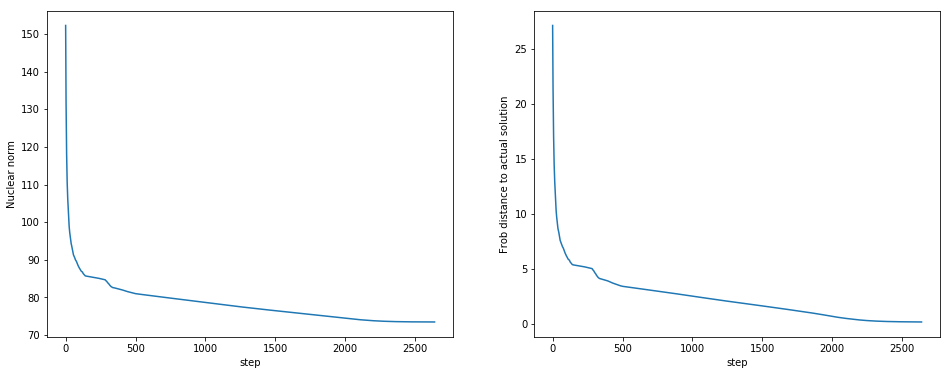

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 6))

ax1.plot(norms)
ax2.plot(distances)

ax1.set_xlabel("step")
ax2.set_xlabel("step")

ax1.set_ylabel("Nuclear norm")
ax2.set_ylabel("Frob distance to actual solution")

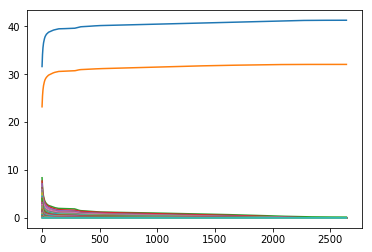

In [32]:
sing_vals = np.array(sing_vals)
plt.plot(sing_vals)

In [53]:
def obj_func(m):
    svd = np.linalg.svd(m, compute_uv=False)
    
    return np.sum(svd[2:]) 

def comp_grad(m, boolMask, obj_func):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3
    
    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j] and np.random.random() > 1 - portion:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))
                
    return grad

def comp_hessian(m, boolMask, of):
    """ Computes hessian (only diagonal) """
    epsilon = 1e-3
    
    hessian = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                row = []
                
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian.append((of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2)
                
    return hessian


starting_point = np.copy(original)

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
starting_point[boolMask] = 0

prev_norm = np.linalg.norm(starting_point,'nuc')

norms = []
distances = []
sing_vals = []

current_point = starting_point

#pl.imshow(np.abs((current_point-original)/original), cmap=plt.get_cmap('hot'),
#          interpolation='nearest', vmin=0, vmax=1)
#pl.colorbar()


initial_s = 4
s = 4
portion = 1.1
for i in range(100000):
    cur_norm = np.linalg.norm(current_point,'nuc')
    norms.append(cur_norm)
    sing_vals.append(np.linalg.svd(current_point, compute_uv=False))
    distances.append(np.linalg.norm(current_point-original,'fro'))
    diff = cur_norm - prev_norm
    
    # portion really should depend on s since smaller s implies the need of a more accurate gradient estimate
    #portion = 1 - np.exp(-1/(20*s))
    #if i % 1000 == 0:
    print(i, cur_norm, diff, np.linalg.norm(current_point-original,'fro'), initial_s, s, portion)
    prev_norm = cur_norm
    if diff >= 0 and i > 1:
        break
    
    ### slowest part of the code ###
    descent = np.dot(np.linalg.inv(np.diag(comp_hessian(current_point,boolMask,obj_func))),
       comp_grad(current_point,boolMask,obj_func))
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    reg = 0.39
    next_point = current_point - reg*descent_matrix
    
    current_point = next_point
    
    #current_point, initial_s, s = line_search(current_point, grad, obj_func, s = initial_s)

0 152.29711852439203 0.0 27.156778309945274 4 4 1.1
1 122.46765363426667 -29.829464890125365 18.7344747820012 4 4 1.1
2 110.40123606882409 -12.066417565442578 14.75405259148185 4 4 1.1
3 102.84005559756625 -7.561180471257842 12.146832509879745 4 4 1.1
4 97.75332042311075 -5.086735174455498 10.311833836543828 4 4 1.1
5 93.96783276837083 -3.7854876547399243 8.890079082759126 4 4 1.1
6 90.81655167863084 -3.1512810897399817 7.687733448194142 4 4 1.1
7 88.40245132021545 -2.4141003584153964 6.731616974995474 4 4 1.1
8 86.39869550597118 -2.003755814244272 5.933440667709457 4 4 1.1
9 84.8222701820599 -1.5764253239112804 5.28381055307899 4 4 1.1
10 83.59615240966134 -1.2261177723985526 4.785022204883488 4 4 1.1
11 82.49390333394314 -1.1022490757182055 4.311903375388649 4 4 1.1
12 81.56822541805798 -0.92567791588516 3.9158644137262106 4 4 1.1
13 80.77666660179524 -0.7915588162627358 3.561090290281081 4 4 1.1
14 80.09814624654572 -0.6785203552495176 3.2589101759722974 4 4 1.1
15 79.46702530182822

118 73.42500328064801 -0.0009357174512558686 0.08074021548309196 4 4 1.1
119 73.42409797315707 -0.000905307490938867 0.0800977152840292 4 4 1.1
120 73.4232210094128 -0.0008769637442753719 0.07946634723159424 4 4 1.1
121 73.42237050755939 -0.0008505018534066267 0.07884551856477183 4 4 1.1
122 73.42154429495055 -0.0008262126088425248 0.07823450149666628 4 4 1.1
123 73.42074051590485 -0.0008037790456967286 0.07763272972227171 4 4 1.1
124 73.4199574446694 -0.0007830712354603975 0.07703968778239116 4 4 1.1
125 73.41919347627123 -0.0007639683981608414 0.07645485528585133 4 4 1.1
126 73.41844721255296 -0.0007462637182698018 0.07587775265796491 4 4 1.1
127 73.41771730391694 -0.0007299086360177398 0.07530786454285347 4 4 1.1
128 73.41700221112025 -0.0007150927966961262 0.07474469674326709 4 4 1.1
129 73.41630091417848 -0.0007012969417701242 0.07418795906069592 4 4 1.1
130 73.41561247617659 -0.0006884380018874481 0.07363728378776103 4 4 1.1
131 73.41493614379054 -0.0006763323860496939 0.07309235

230 73.37527388624724 -0.00028240778344468254 0.03048537929411837 4 4 1.1
231 73.37499451302111 -0.00027937322613524884 0.030116200706335406 4 4 1.1
232 73.37471814039768 -0.00027637262343205293 0.029747357724318302 4 4 1.1
233 73.37444471919149 -0.00027342120618811805 0.029378806924922972 4 4 1.1
234 73.37417418588313 -0.00027053330835258294 0.029010510459056546 4 4 1.1
235 73.37390646415042 -0.0002677217327118342 0.028642436494367235 4 4 1.1
236 73.37364146652469 -0.0002649976257345088 0.02827455939310927 4 4 1.1
237 73.37337909730226 -0.0002623692224261731 0.027906859504363602 4 4 1.1
238 73.37311924987955 -0.00025984742271134564 0.027539321942095997 4 4 1.1
239 73.37286181434857 -0.0002574355309832299 0.02717193862409633 4 4 1.1
240 73.37260667765632 -0.00025513669224608293 0.026804706625953453 4 4 1.1
241 73.37235372301808 -0.0002529546382419312 0.026437627583508934 4 4 1.1
242 73.37210283340829 -0.00025088960978791874 0.02607070732599881 4 4 1.1
243 73.37185389263725 -0.000248940

340 73.35502862543844 -2.193811434381132e-05 0.00012800888312647677 4 4 1.1
341 73.35500864067455 -1.9984763881097933e-05 0.0001152297186662189 4 4 1.1
342 73.35499043887877 -1.8201795782601948e-05 0.00010386617620399779 4 4 1.1
343 73.35497386316825 -1.6575710517940934e-05 9.374172355234823e-05 4 4 1.1
344 73.3549587693471 -1.5093821147615927e-05 8.470439359989184e-05 4 4 1.1
345 73.3549450251873 -1.3744159801376554e-05 7.662312362014585e-05 4 4 1.1
346 73.35493250973038 -1.2515456930373148e-05 6.938462846578493e-05 4 4 1.1
347 73.35492111244052 -1.1397289853221082e-05 6.289076023044365e-05 4 4 1.1
348 73.35491073239778 -1.0380042738233897e-05 5.705626077739762e-05 4 4 1.1
349 73.3549012775695 -9.454828287402961e-06 5.180686162617348e-05 4 4 1.1
350 73.35489266415657 -8.613412930458253e-06 4.7077713685470907e-05 4 4 1.1
351 73.35488481593829 -7.84821827437554e-06 4.281204948187047e-05 4 4 1.1
352 73.35487766361767 -7.15232062020732e-06 3.896004636361526e-05 4 4 1.1
353 73.354871144213

KeyboardInterrupt: 

Text(0,0.5,'Frob distance to actual solution')

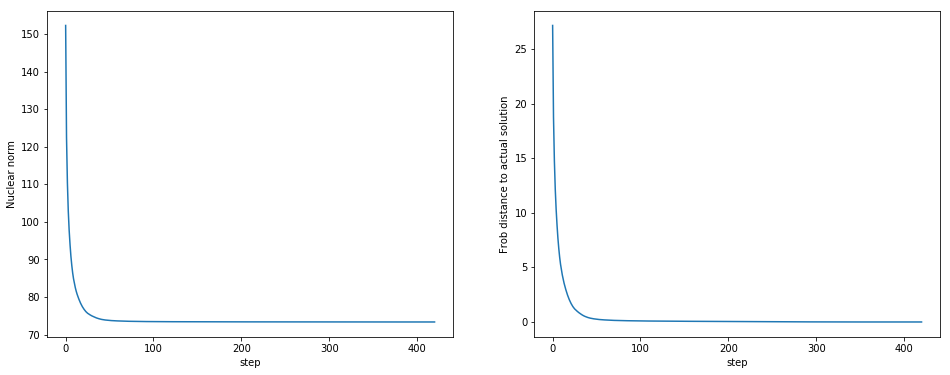

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 6))

ax1.plot(norms)
ax2.plot(distances)

ax1.set_xlabel("step")
ax2.set_xlabel("step")

ax1.set_ylabel("Nuclear norm")
ax2.set_ylabel("Frob distance to actual solution")

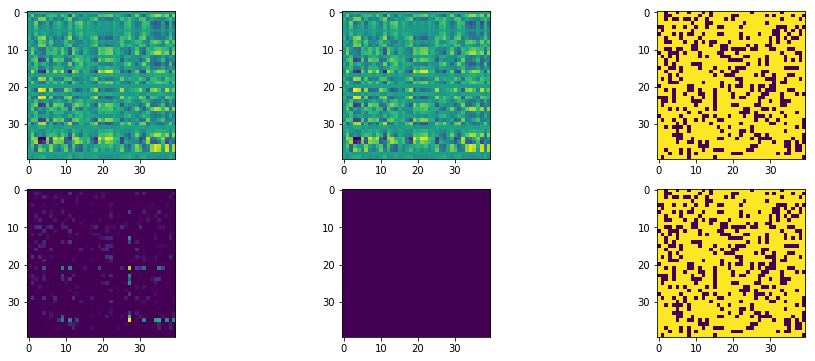

In [68]:
fig, ((ax1, ax2, ax3), (ax21, ax22, ax23)) = plt.subplots(2,3, figsize=(16,6))

ax1.imshow(current_point)
ax2.imshow(original)
ax3.imshow(current_point == original)

ax21.imshow(np.abs(current_point - original))
ax22.imshow(np.abs(current_point - original) < 5e-8)
ax23.imshow(mask)

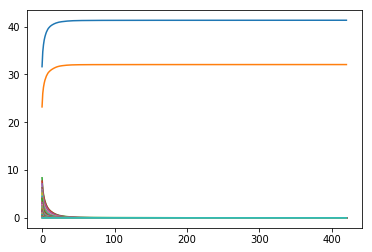

In [69]:
sing_vals = np.array(sing_vals)
plt.plot(sing_vals)

This seems somewhat faster. Now let's compare this with regular nuclear norm and with ignoring only first largest singual value.

Ignoring only first singualar value: (note: reg=3.9 makes it blow up)

In [72]:
def obj_func(m):
    svd = np.linalg.svd(m, compute_uv=False)
    
    return np.sum(svd[1:]) 

def comp_grad(m, boolMask, obj_func):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3
    
    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j] and np.random.random() > 1 - portion:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))
                
    return grad

def comp_hessian(m, boolMask, of):
    """ Computes hessian (only diagonal) """
    epsilon = 1e-3
    
    hessian = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                row = []
                
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian.append((of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2)
                
    return hessian


starting_point = np.copy(original)

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
starting_point[boolMask] = 0

prev_norm = np.linalg.norm(starting_point,'nuc')

norms = []
distances = []
sing_vals = []

current_point = starting_point

#pl.imshow(np.abs((current_point-original)/original), cmap=plt.get_cmap('hot'),
#          interpolation='nearest', vmin=0, vmax=1)
#pl.colorbar()


initial_s = 4
s = 4
portion = 1.1
for i in range(100000):
    cur_norm = np.linalg.norm(current_point,'nuc')
    norms.append(cur_norm)
    sing_vals.append(np.linalg.svd(current_point, compute_uv=False))
    distances.append(np.linalg.norm(current_point-original,'fro'))
    diff = cur_norm - prev_norm
    
    # portion really should depend on s since smaller s implies the need of a more accurate gradient estimate
    #portion = 1 - np.exp(-1/(20*s))
    #if i % 1000 == 0:
    print(i, cur_norm, diff, np.linalg.norm(current_point-original,'fro'), initial_s, s, portion)
    prev_norm = cur_norm
    if diff >= 0 and i > 1:
        break
    
    ### slowest part of the code ###
    descent = np.dot(np.linalg.inv(np.diag(comp_hessian(current_point,boolMask,obj_func))),
       comp_grad(current_point,boolMask,obj_func))
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    reg = 0.38
    next_point = current_point - reg*descent_matrix
    
    current_point = next_point
    
    #current_point, initial_s, s = line_search(current_point, grad, obj_func, s = initial_s)

0 152.29711852439203 0.0 27.156778309945274 4 4 1.1
1 125.23104234173049 -27.066076182661547 19.783291597664295 4 4 1.1
2 113.41445828993932 -11.816584051791168 16.04066127478033 4 4 1.1
3 105.80241607451069 -7.61204221542863 13.493684457816748 4 4 1.1
4 100.2051371644123 -5.597278910098382 11.585399101671808 4 4 1.1
5 96.55609124062804 -3.6490459237842714 10.233164552806526 4 4 1.1
6 93.51529589383705 -3.0407953467909863 9.087821766913864 4 4 1.1
7 91.10950701476605 -2.4057888790709967 8.147007993438248 4 4 1.1
8 89.10932848833525 -2.000178526430801 7.356681822760512 4 4 1.1
9 87.3533409222159 -1.7559875661193445 6.654612782746912 4 4 1.1
10 85.95609105962714 -1.3972498625887653 6.071850207787479 4 4 1.1
11 84.70006555159783 -1.2560255080293103 5.543499182772382 4 4 1.1
12 83.5876541881433 -1.1124113634545267 5.073653609390529 4 4 1.1
13 82.63599437094312 -0.9516598172001807 4.663121708954073 4 4 1.1
14 81.84806995696246 -0.7879244139806616 4.31467160086712 4 4 1.1
15 81.1473062158458

119 73.5032146265167 -0.0013535626563623282 0.2768692440781813 4 4 1.1
120 73.50192027657556 -0.0012943499411335324 0.2761420497762481 4 4 1.1
121 73.5006835192776 -0.0012367572979599117 0.27543617258034897 4 4 1.1
122 73.4995027203175 -0.0011807989601066993 0.27475075186214115 4 4 1.1
123 73.49837631959142 -0.0011264007260791686 0.2740849140584074 4 4 1.1
124 73.49730285833807 -0.0010734612533411791 0.2734378101501089 4 4 1.1
125 73.49628093662317 -0.001021921714908558 0.27280858542875536 4 4 1.1
126 73.49530911444802 -0.0009718221751455758 0.272196274812283 4 4 1.1
127 73.49438591344001 -0.0009232010080069131 0.2715999005435547 4 4 1.1
128 73.49350910324846 -0.0008768101915563875 0.27101849199449907 4 4 1.1
129 73.4926767303761 -0.0008323728723524937 0.2704511660236971 4 4 1.1
130 73.49188704947413 -0.0007896809019740658 0.26989703168092616 4 4 1.1
131 73.49113825593403 -0.0007487935400973811 0.2693552299787157 4 4 1.1
132 73.49042848916804 -0.0007097667659934359 0.2688249474249817 4

KeyboardInterrupt: 

Text(0,0.5,'Frob distance to actual solution')

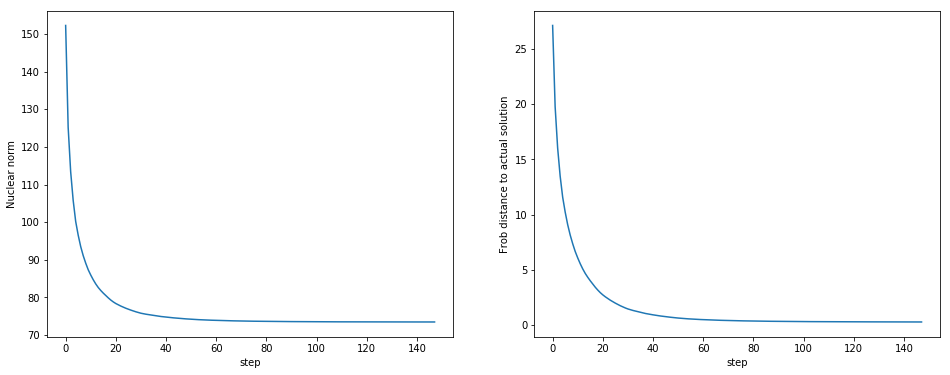

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 6))

ax1.plot(norms)
ax2.plot(distances)

ax1.set_xlabel("step")
ax2.set_xlabel("step")

ax1.set_ylabel("Nuclear norm")
ax2.set_ylabel("Frob distance to actual solution")

In [76]:
def obj_func(m):
    svd = np.linalg.svd(m, compute_uv=False)
    
    return np.sum(svd) 

def comp_grad(m, boolMask, obj_func):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3
    
    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j] and np.random.random() > 1 - portion:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))
                
    return grad

def comp_hessian(m, boolMask, of):
    """ Computes hessian (only diagonal) """
    epsilon = 1e-3
    
    hessian = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                row = []
                
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian.append((of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2)
                
    return hessian


starting_point = np.copy(original)

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
starting_point[boolMask] = 0

prev_norm = np.linalg.norm(starting_point,'nuc')

norms = []
distances = []
sing_vals = []

current_point = starting_point

#pl.imshow(np.abs((current_point-original)/original), cmap=plt.get_cmap('hot'),
#          interpolation='nearest', vmin=0, vmax=1)
#pl.colorbar()


initial_s = 4
s = 4
portion = 1.1
for i in range(100000):
    cur_norm = np.linalg.norm(current_point,'nuc')
    norms.append(cur_norm)
    sing_vals.append(np.linalg.svd(current_point, compute_uv=False))
    distances.append(np.linalg.norm(current_point-original,'fro'))
    diff = cur_norm - prev_norm
    
    # portion really should depend on s since smaller s implies the need of a more accurate gradient estimate
    #portion = 1 - np.exp(-1/(20*s))
    #if i % 1000 == 0:
    print(i, cur_norm, diff, np.linalg.norm(current_point-original,'fro'), initial_s, s, portion)
    prev_norm = cur_norm
    if diff >= 0 and i > 1:
        break
    
    ### slowest part of the code ###
    descent = np.dot(np.linalg.inv(np.diag(comp_hessian(current_point,boolMask,obj_func))),
       comp_grad(current_point,boolMask,obj_func))
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    reg = 0.36
    next_point = current_point - reg*descent_matrix
    
    current_point = next_point
    
    #current_point, initial_s, s = line_search(current_point, grad, obj_func, s = initial_s)

0 152.29711852439203 0.0 27.156778309945274 4 4 1.1
1 128.8462546235877 -23.450863900804336 20.99808653306373 4 4 1.1
2 117.6847429019984 -11.161511721589292 17.536796697656193 4 4 1.1
3 110.14499379828435 -7.539749103714058 15.056297402325967 4 4 1.1
4 104.56219103553173 -5.582802762752621 13.164710953028962 4 4 1.1
5 100.97265313460318 -3.5895379009285477 11.850155992745115 4 4 1.1
6 97.58434235557695 -3.3883107790262272 10.632718920484217 4 4 1.1
7 94.99684867519065 -2.5874936803863022 9.661975384102767 4 4 1.1
8 92.88658860997808 -2.1102600652125716 8.833998246148699 4 4 1.1
9 90.91177552253384 -1.9748130874442325 8.064654899905202 4 4 1.1
10 89.32422201508726 -1.5875535074465859 7.4288782579563435 4 4 1.1
11 87.9642052659717 -1.3600167491155588 6.87190919334282 4 4 1.1
12 86.70658114718346 -1.257624118788243 6.352371428063126 4 4 1.1
13 85.56901602418179 -1.1375651230016643 5.874123422470232 4 4 1.1
14 84.61499848299405 -0.9540175411877385 5.47472730856977 4 4 1.1
15 83.7258503175

119 73.53977068305187 -0.003095183307650018 0.19219843057275576 4 4 1.1
120 73.53684352075157 -0.0029271623002955494 0.19066750970945037 4 4 1.1
121 73.53395072288654 -0.002892797865030161 0.18914666172195074 4 4 1.1
122 73.5312136129652 -0.00273710992134113 0.187704051499376 4 4 1.1
123 73.5285131974982 -0.002700415467003836 0.1862711346577141 4 4 1.1
124 73.52595076518168 -0.0025624323165232 0.18490675019262767 4 4 1.1
125 73.52343245204366 -0.002518313138011763 0.1835551232136444 4 4 1.1
126 73.52103104383754 -0.002401408206125666 0.1822599661914531 4 4 1.1
127 73.51868267665351 -0.002348367184026756 0.18098234932305862 4 4 1.1
128 73.51643095646548 -0.0022517201880276616 0.17974913143690016 4 4 1.1
129 73.51423945105982 -0.002191505405662042 0.1785376294139019 4 4 1.1
130 73.51212384673222 -0.002115604327599385 0.1773574464567245 4 4 1.1
131 73.51007395548592 -0.002049891246301172 0.17620277512234542 4 4 1.1
132 73.50808796713767 -0.0019859883482524765 0.1750718158280754 4 4 1.1
13

KeyboardInterrupt: 

Text(0,0.5,'Frob distance to actual solution')

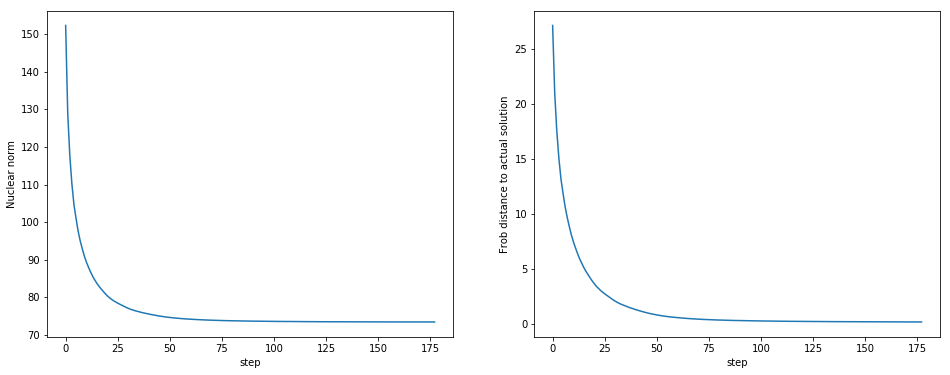

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 6))

ax1.plot(norms)
ax2.plot(distances)

ax1.set_xlabel("step")
ax2.set_xlabel("step")

ax1.set_ylabel("Nuclear norm")
ax2.set_ylabel("Frob distance to actual solution")